# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

api_key = 'f92c307f7321465204c615d93746432d'

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

647

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
# used to call api for weather query

def city_wthr(city):
    city_info = requests.get('http://api.openweathermap.org/data/2.5/weather?q=' + city + '&APPID=' + api_key).json()
    return city_info

wthr_data = {x : city_wthr(x) for x in cities}
wthr_data

{'ilulissat': {'coord': {'lon': -51.1, 'lat': 69.22},
  'weather': [{'id': 801,
    'main': 'Clouds',
    'description': 'few clouds',
    'icon': '02d'}],
  'base': 'stations',
  'main': {'temp': 289.15,
   'pressure': 1020,
   'humidity': 26,
   'temp_min': 289.15,
   'temp_max': 289.15},
  'visibility': 10000,
  'wind': {'speed': 8.2, 'deg': 100},
  'clouds': {'all': 20},
  'dt': 1565549696,
  'sys': {'type': 1,
   'id': 165,
   'message': 0.0061,
   'country': 'GL',
   'sunrise': 1565503831,
   'sunset': 1565570935},
  'timezone': -7200,
  'id': 3423146,
  'name': 'Ilulissat',
  'cod': 200},
 'mataura': {'coord': {'lon': 168.86, 'lat': -46.19},
  'weather': [{'id': 802,
    'main': 'Clouds',
    'description': 'scattered clouds',
    'icon': '03n'}],
  'base': 'stations',
  'main': {'temp': 275.358,
   'pressure': 991.03,
   'humidity': 98,
   'temp_min': 275.358,
   'temp_max': 275.358,
   'sea_level': 991.03,
   'grnd_level': 989.2},
  'wind': {'speed': 1.82, 'deg': 333.111},
  '

In [66]:
new_wthr = pd.DataFrame(wthr_data)
new_wthr = new_wthr.T
newer_wthr = new_wthr[['coord', 'main', 'wind', 'clouds']]
newest_wthr = newer_wthr.dropna(how='any')
newest_wthr.head()

,coord,main,wind,clouds
ilulissat,"{'lon': -51.1, 'lat': 69.22}","{'temp': 289.15, 'pressure': 1020, 'humidity':...","{'speed': 8.2, 'deg': 100}",{'all': 20}
mataura,"{'lon': 168.86, 'lat': -46.19}","{'temp': 275.358, 'pressure': 991.03, 'humidit...","{'speed': 1.82, 'deg': 333.111}",{'all': 25}
punta arenas,"{'lon': -70.91, 'lat': -53.16}","{'temp': 276.04, 'pressure': 1021, 'humidity':...","{'speed': 5.1, 'deg': 160}",{'all': 75}
saskylakh,"{'lon': 114.09, 'lat': 71.97}","{'temp': 286.858, 'pressure': 1009.91, 'humidi...","{'speed': 2.6, 'deg': 128.753}",{'all': 0}
atuona,"{'lon': -139.03, 'lat': -9.8}","{'temp': 299.759, 'pressure': 1015, 'humidity'...","{'speed': 8.79, 'deg': 93.046}",{'all': 0}


In [67]:
needed_wthr = newest_wthr
needed_wthr['lat'] = [x['lat'] for x in newest_wthr['coord'].values]
needed_wthr['temp/humidity'] = [[x['temp'], x['humidity']] for x in newest_wthr['main'].values]
needed_wthr['wind speed'] = [x['speed'] for x in newest_wthr['wind'].values]
needed_wthr['cloudiness'] = [x['all'] for x in newest_wthr['clouds'].values]
needed_wthr = newest_wthr[['lat','temp/humidity','wind speed', 'cloudiness']]
needed_wthr

C:\Users\zackf\Anaconda3.0\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\zackf\Anaconda3.0\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zackf\Anaconda3.0\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,lat,temp/humidity,wind speed,cloudiness
ilulissat,69.22,"[289.15, 26]",8.20,20
mataura,-46.19,"[275.358, 98]",1.82,25
punta arenas,-53.16,"[276.04, 47]",5.10,75
saskylakh,71.97,"[286.858, 65]",2.60,0
atuona,-9.80,"[299.759, 69]",8.79,0
upington,-28.46,"[288.15, 16]",0.50,0
nanortalik,60.14,"[281.358, 70]",2.52,3
kysyl-syr,63.90,"[285.958, 83]",1.54,46
benghazi,32.12,"[300.858, 75]",7.77,0
provideniya,64.42,"[281.559, 96]",3.31,100


In [69]:
# dataframe that will be used for plotting data
# also puts all data into final format for visualization purposes
df_wthr = needed_wthr
df_wthr['temp (F)'] = [round((x[0] - 273.15) * (9/5) + 32, 2) for x in needed_wthr['temp/humidity'].values]
df_wthr['humidity lvl'] = [x[1] for x in needed_wthr['temp/humidity'].values]
df_wthr = df_wthr[['lat', 'wind speed', 'temp (F)', 'humidity lvl', 'cloudiness']]
df_wthr.head()

C:\Users\zackf\Anaconda3.0\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\zackf\Anaconda3.0\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,lat,wind speed,temp (F),humidity lvl,cloudiness
ilulissat,69.22,8.20,60.80,26,20
mataura,-46.19,1.82,35.97,98,25
punta arenas,-53.16,5.10,37.20,47,75
saskylakh,71.97,2.60,56.67,65,0
atuona,-9.80,8.79,79.90,69,0


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [70]:
# export data file
df_wthr.to_csv('munged_wthrdf.csv')

In [71]:
df_wthr.head()

,lat,wind speed,temp (F),humidity lvl,cloudiness
ilulissat,69.22,8.20,60.80,26,20
mataura,-46.19,1.82,35.97,98,25
punta arenas,-53.16,5.10,37.20,47,75
saskylakh,71.97,2.60,56.67,65,0
atuona,-9.80,8.79,79.90,69,0


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

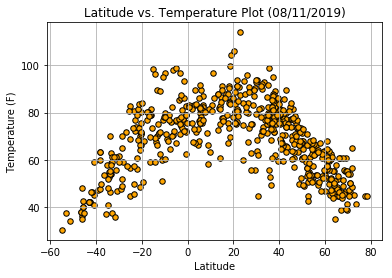

In [78]:
# creation of scatterplots
city_lats = df_wthr['lat'].values 
plt.scatter(city_lats, df_wthr['temp (F)'].values, s=30, marker='o', color='orange', edgecolor='black')
plt.title('Latitude vs. Temperature Plot (08/11/2019)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

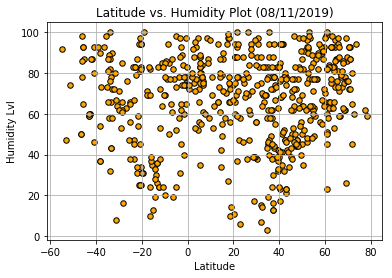

In [79]:
plt.scatter(city_lats, df_wthr['humidity lvl'].values, s=30, marker='o', color='orange', edgecolor='black')
plt.title('Latitude vs. Humidity Plot (08/11/2019)')
plt.xlabel('Latitude')
plt.ylabel('Humidity Lvl')
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

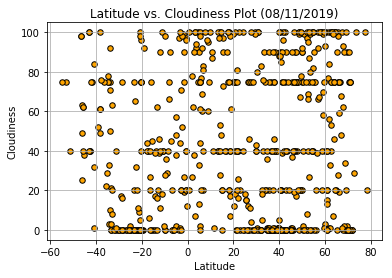

In [80]:
plt.scatter(city_lats, df_wthr['cloudiness'].values, s=30, marker='o', color='orange', edgecolor='black')
plt.title('Latitude vs. Cloudiness Plot (08/11/2019)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

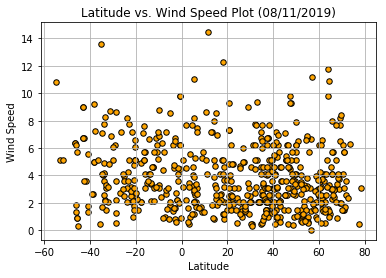

In [84]:
plt.scatter(city_lats, df_wthr['wind speed'].values, s=30, marker='o', color='orange', edgecolor='black')
plt.title('Latitude vs. Wind Speed Plot (08/11/2019)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.show()

In [ ]:
#### OBSERVABLE TRENDS BASED ON DATA ####

# There are a few trends that can be found by looking at the scatter plots. One of these trends is that temperature
# will increase the closer one approaches a latitude of 0'. A second trend that can be seen from the visualizations is 
# that cloudiness most likely is dependent upon other factors than soley on latitude to determine the amound present. 
# A third trend that can be observed is that wind speed also seems to be more dependent on factors other than solely 
# the latitude, similar to the presence of clouds in the area. 